<a href="https://colab.research.google.com/github/boiBASH/Tolaram_Project/blob/main/tolaram_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import pandas
import pandas as pd

# Step 3: Load your dataset (replace with the actual path in your Drive)
file_path = "/content/drive/MyDrive/TOLARAM/cleaned_data_analysis.csv"
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-1-98f22eac6773>:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [2]:
df

,Brand,Designation,SKU_Code,Salesman_Code,Customer_Phone,Order_Id,Delivered_date,Delivered Qty,Redistribution Value
0,8,VAN SALES EXECUTIVE,10002849,808727,7010009941,11849614,03/10/2024 00:00,1.0,"18,400"
1,8,VAN SALES EXECUTIVE,10002849,808727,7010009941,11494410,15/08/2024 00:00,1.0,"18,400"
2,8,VAN SALES EXECUTIVE,10002857,808727,7010009941,12551567,02/01/2025 00:00,1.0,"19,950"
3,8,VAN SALES EXECUTIVE,10002857,808727,7010009941,11849614,03/10/2024 00:00,1.0,"18,400"
4,8,VAN SALES EXECUTIVE,10002857,808727,7010009941,11494410,15/08/2024 00:00,1.0,"18,400"
...,...,...,...,...,...,...,...,...,...
98913,5,FIELD EXECUTIVE,10003376,808604,9169810564,12493847,19/12/2024 00:00,1.0,"18,500"
98914,5,FIELD EXECUTIVE,10003376,808604,9169810564,12682291,21/01/2025 00:00,2.0,"40,000"
98915,5,FIELD EXECUTIVE,10003395,808604,9169810564,12682291,21/01/2025 00:00,1.0,"20,000"
98916,5,FIELD EXECUTIVE,10003397,808604,9169810564,12682291,21/01/2025 00:00,1.0,"20,000"


In [3]:
# Step 1: Convert Delivered_date to datetime
df['Delivered_date'] = pd.to_datetime(df['Delivered_date'], errors='coerce', dayfirst=True)

print(df['Delivered_date'].isna().sum())

0


In [4]:
# Display the first few rows and summary info
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98918 entries, 0 to 98917
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Brand                 98918 non-null  int64         
 1   Designation           98918 non-null  object        
 2   SKU_Code              98918 non-null  object        
 3   Salesman_Code         98918 non-null  object        
 4   Customer_Phone        98918 non-null  int64         
 5   Order_Id              98918 non-null  int64         
 6   Delivered_date        98918 non-null  datetime64[ns]
 7   Delivered Qty         98918 non-null  float64       
 8   Redistribution Value  98918 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 6.8+ MB


(   Brand          Designation  SKU_Code Salesman_Code  Customer_Phone  \
 0      8  VAN SALES EXECUTIVE  10002849        808727      7010009941   
 1      8  VAN SALES EXECUTIVE  10002849        808727      7010009941   
 2      8  VAN SALES EXECUTIVE  10002857        808727      7010009941   
 3      8  VAN SALES EXECUTIVE  10002857        808727      7010009941   
 4      8  VAN SALES EXECUTIVE  10002857        808727      7010009941   
 
    Order_Id Delivered_date  Delivered Qty Redistribution Value  
 0  11849614     2024-10-03            1.0               18,400  
 1  11494410     2024-08-15            1.0               18,400  
 2  12551567     2025-01-02            1.0               19,950  
 3  11849614     2024-10-03            1.0               18,400  
 4  11494410     2024-08-15            1.0               18,400  ,
 None)

In [5]:
# Step 2: Clean and convert Redistribution Value (remove commas and convert to float)
# Convert 'Redistribution Value' to string first, if it's not already
df['Redistribution Value'] = df['Redistribution Value'].astype(str).str.replace(',', '', regex=False).astype(float)


# Step 2: Clean and convert Redistribution Value (remove commas and convert to float)
#df['Redistribution Value'] = df['Redistribution Value'].str.replace(',', '', regex=False).astype(float)

# Step 3: Fill missing 'Delivered Qty' with 0 (or could be dropped if preferred)
df['Delivered Qty'] = df['Delivered Qty'].fillna(0)


# Confirm changes
# Quick check for nulls or conversion issues
df[['Redistribution Value', 'Delivered_date']].info()

df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98918 entries, 0 to 98917
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Redistribution Value  98918 non-null  float64       
 1   Delivered_date        98918 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


,0
Brand,int64
Designation,object
SKU_Code,object
Salesman_Code,object
Customer_Phone,int64
Order_Id,int64
Delivered_date,datetime64[ns]
Delivered Qty,float64
Redistribution Value,float64


<ipython-input-40-7f5f8e4dddd9>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
<ipython-input-40-7f5f8e4dddd9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


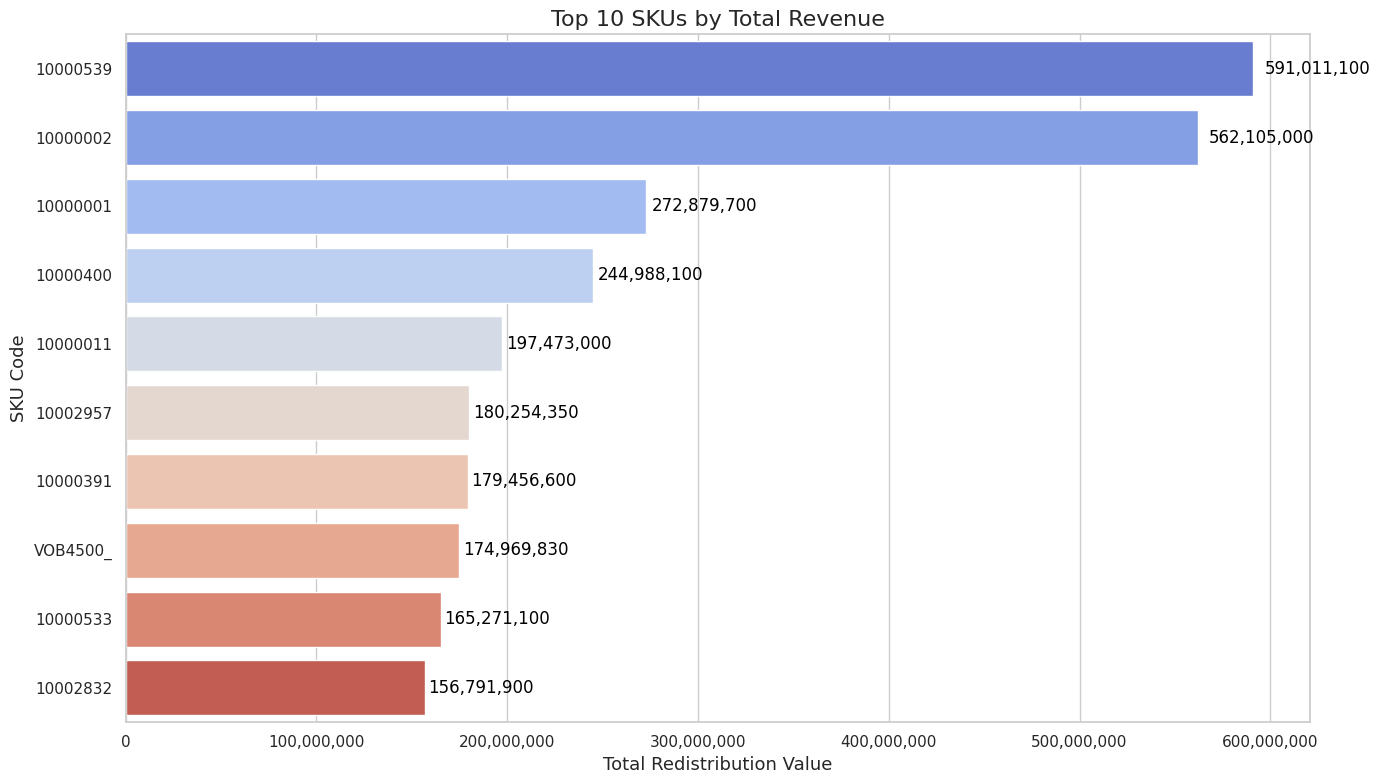

In [40]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

top_skus_value = (df.groupby("SKU_Code")["Redistribution Value"].sum().sort_values(ascending=False).head(10))

plt.figure(figsize=(14, 8))  # Increased size for better readability
ax = sns.barplot(
    x=top_skus_value.values,
    y=top_skus_value.index,
    palette="coolwarm",
    ci=None
)

plt.title("Top 10 SKUs by Total Revenue", fontsize=16)
plt.xlabel("Total Redistribution Value", fontsize=13)
plt.ylabel("SKU Code", fontsize=13)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}')) # Format x-axis to show full numbers

# Optional: Add value labels on each bar
for i, v in enumerate(top_skus_value.values):
    ax.text(v + (v * 0.01), i, f'{int(v):,}', color='black', va='center', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-39-d089d4ec9dd4>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(x=customer_ltv.values, y=customer_ltv.index.astype(str), palette="viridis", ci=None)
<ipython-input-39-d089d4ec9dd4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=customer_ltv.values, y=customer_ltv.index.astype(str), palette="viridis", ci=None)


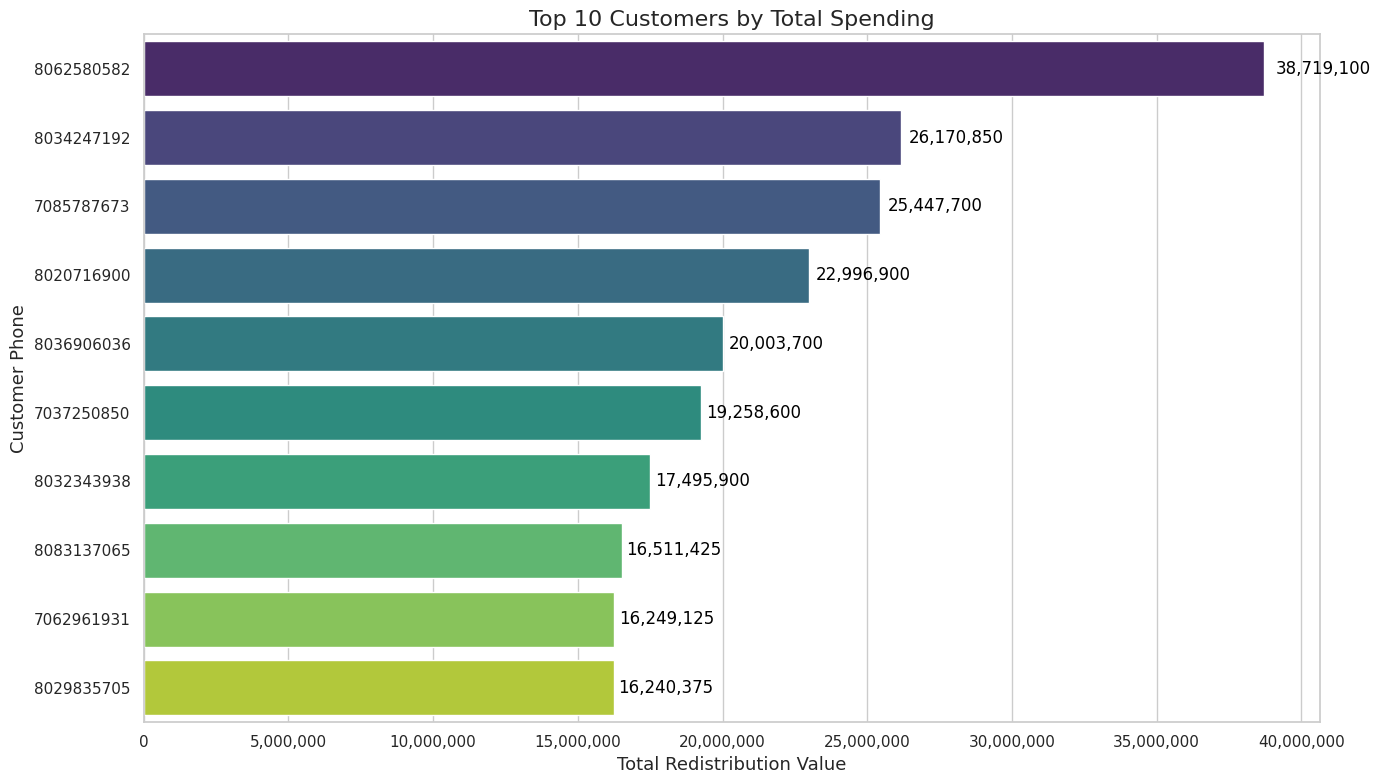

In [39]:
# Customer Lifetime Value ---
customer_ltv = df.groupby("Customer_Phone")["Redistribution Value"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 8))
ax2 = sns.barplot(x=customer_ltv.values, y=customer_ltv.index.astype(str), palette="viridis", ci=None)
plt.title("Top 10 Customers by Total Spending", fontsize=16)
plt.xlabel("Total Redistribution Value", fontsize=13)
plt.ylabel("Customer Phone", fontsize=13)
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
for i, v in enumerate(customer_ltv.values):
    ax2.text(v + (v * 0.01), i, f'{int(v):,}', color='black', va='center', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-37-66b8725e5141>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(x=top_buyers_qty.values, y=top_buyers_qty.index.astype(str), palette="rocket", ci=None)
<ipython-input-37-66b8725e5141>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=top_buyers_qty.values, y=top_buyers_qty.index.astype(str), palette="rocket", ci=None)


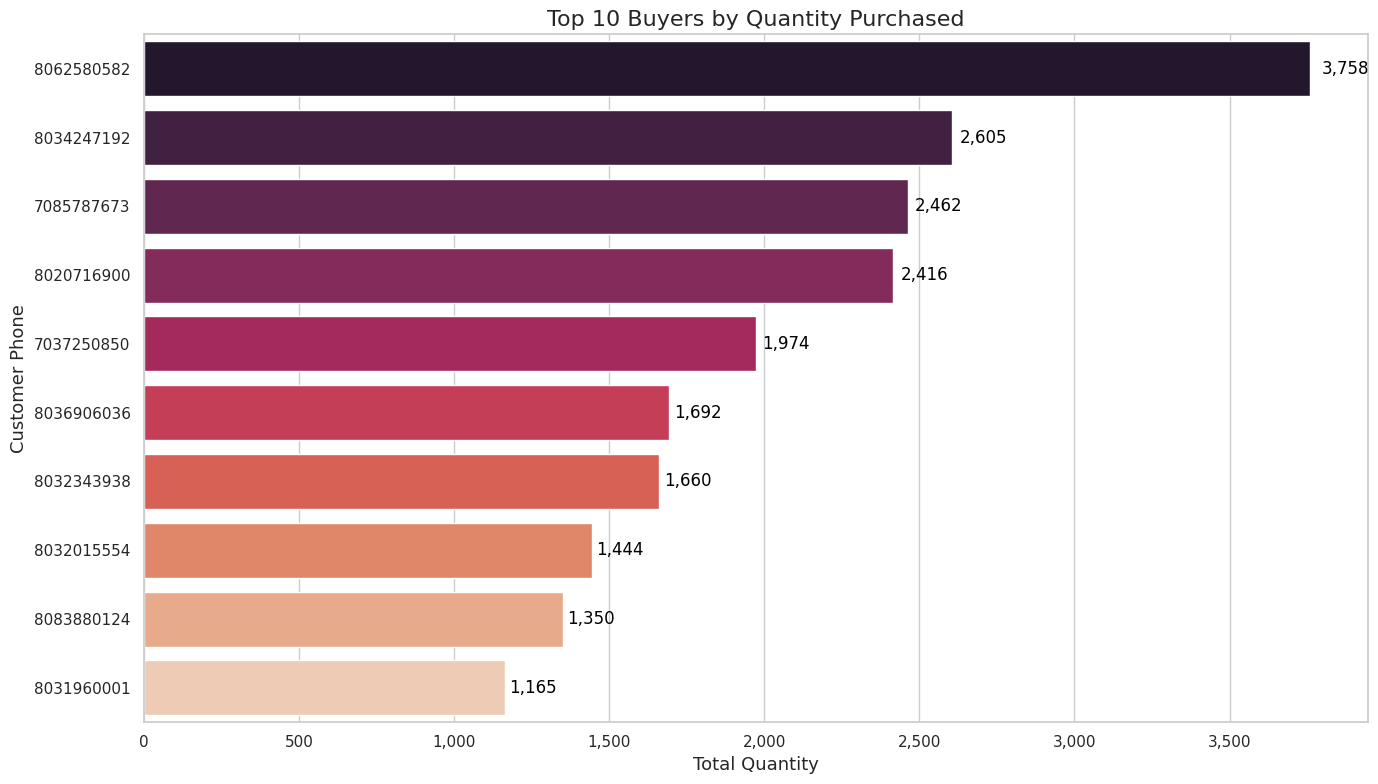

In [37]:
# Top 10 Buyers by Quantity Purchased
top_buyers_qty = (df.groupby("Customer_Phone")["Delivered Qty"].sum().sort_values(ascending=False).head(10))
plt.figure(figsize=(14, 8))
ax2 = sns.barplot(x=top_buyers_qty.values, y=top_buyers_qty.index.astype(str), palette="rocket", ci=None)
plt.title("Top 10 Buyers by Quantity Purchased", fontsize=16)
plt.xlabel("Total Quantity", fontsize=13)
plt.ylabel("Customer Phone", fontsize=13)
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
for i, v in enumerate(top_buyers_qty.values):
    ax2.text(v + (v * 0.01), i, f'{int(v):,}', color='black', va='center', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-38-a3d8c8fd383f>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(x=top_skus.values, y=top_skus.index.astype(str), palette="rocket", ci=None)
<ipython-input-38-a3d8c8fd383f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=top_skus.values, y=top_skus.index.astype(str), palette="rocket", ci=None)


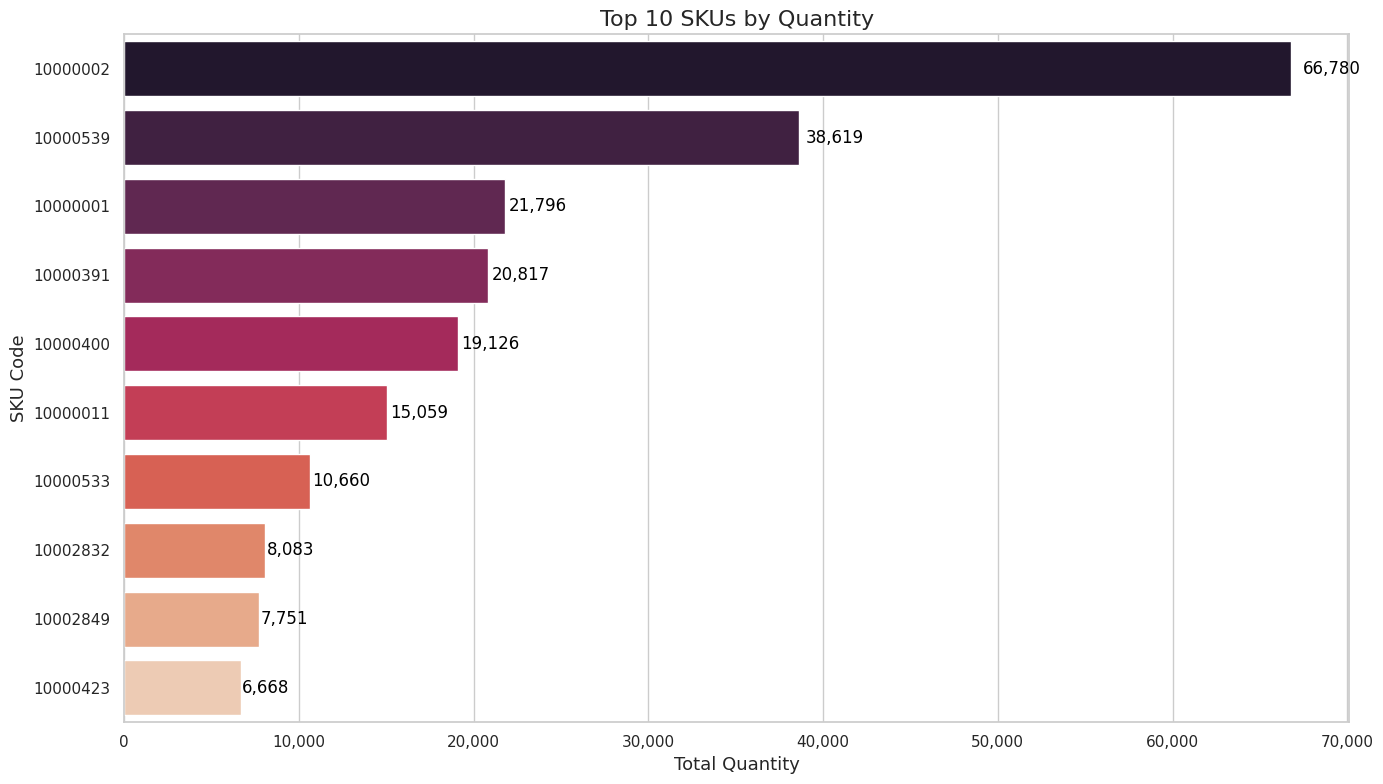

In [38]:
# Top 10 SKUs by Quantity
top_skus = (df.groupby("SKU_Code")["Delivered Qty"].sum().sort_values(ascending=False).head(10))

plt.figure(figsize=(14, 8))
ax2 = sns.barplot(x=top_skus.values, y=top_skus.index.astype(str), palette="rocket", ci=None)
plt.title("Top 10 SKUs by Quantity", fontsize=16)
plt.xlabel("Total Quantity", fontsize=13)
plt.ylabel("SKU Code", fontsize=13)
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
for i, v in enumerate(top_skus.values):
    ax2.text(v + (v * 0.01), i, f'{int(v):,}', color='black', va='center', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-41-24f20cd4f3d8>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=repeat_vs_one_time, x="Type", y="Customer Count", palette="pastel", ci=None)
<ipython-input-41-24f20cd4f3d8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=repeat_vs_one_time, x="Type", y="Customer Count", palette="pastel", ci=None)


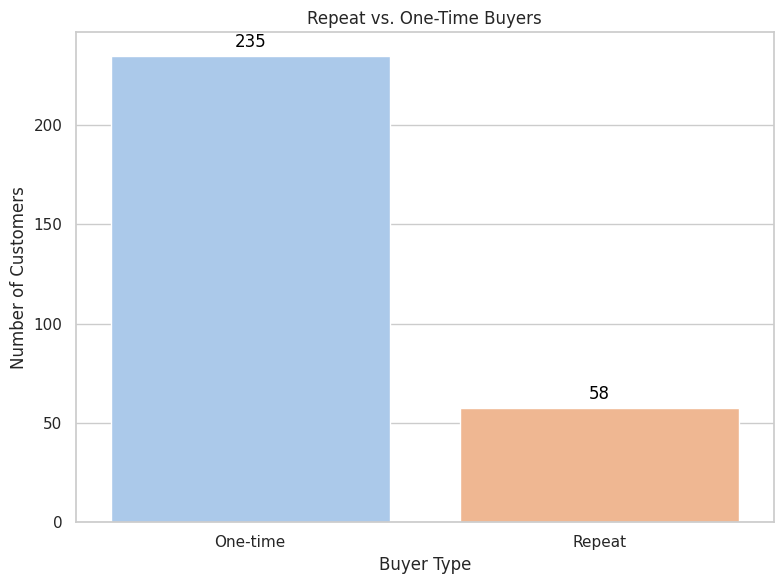

In [41]:
buyer_order_counts = df.groupby("Customer_Phone")["Delivered_date"].nunique()
repeat_vs_one_time = buyer_order_counts.value_counts().reset_index()
repeat_vs_one_time.columns = ['Purchase Count', 'Customer Count']
repeat_vs_one_time['Type'] = repeat_vs_one_time['Purchase Count'].apply(lambda x: 'One-time' if x == 1 else 'Repeat')

# Corrected plot without the error bar
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=repeat_vs_one_time, x="Type", y="Customer Count", palette="pastel", ci=None)
plt.title("Repeat vs. One-Time Buyers")
plt.xlabel("Buyer Type")
plt.ylabel("Number of Customers")

# Add count labels
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        fontsize=12,
        color='black',
        xytext=(0, 10),
        textcoords='offset points'
    )
plt.tight_layout()
plt.show()

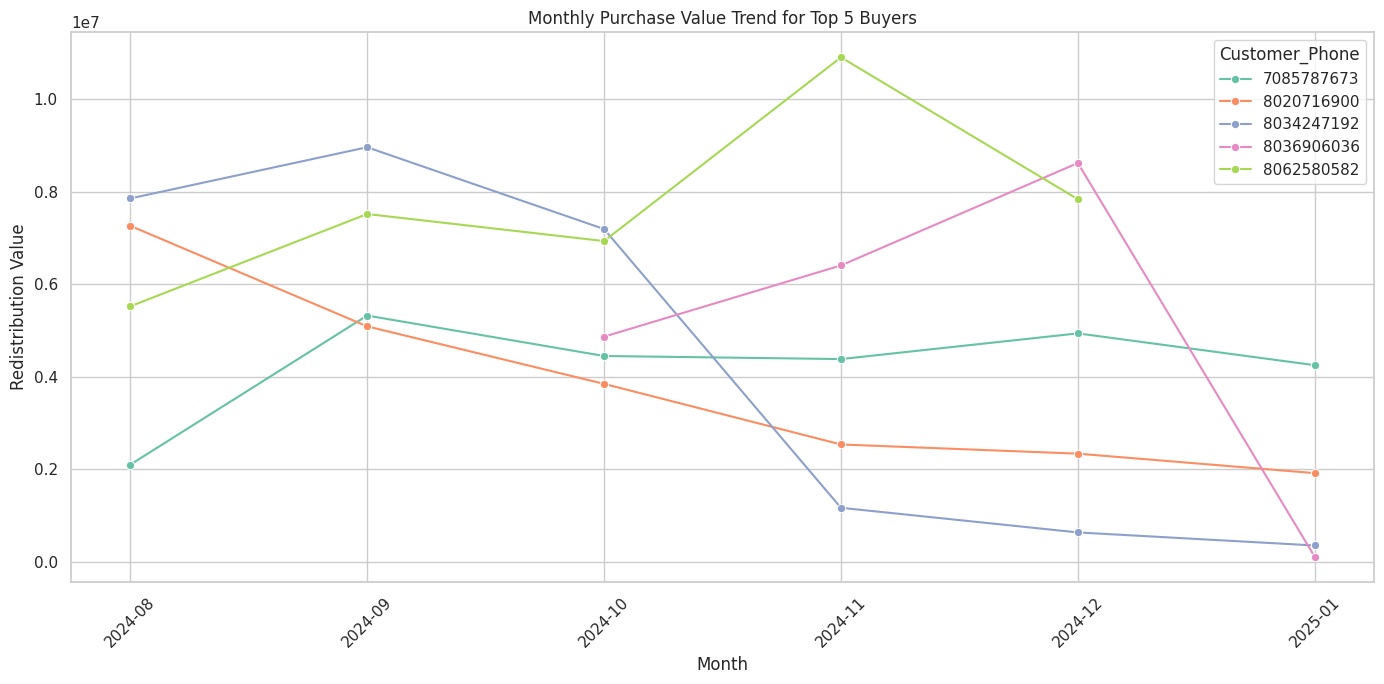

In [42]:
# Get top 5 buyers by total redistribution value
top5_buyers = df.groupby("Customer_Phone")["Redistribution Value"].sum().sort_values(ascending=False).head(5).index

# Filter dataset
df_top_buyers = df[df["Customer_Phone"].isin(top5_buyers)]

# Group by Buyer and Month
buyer_monthly = df_top_buyers.groupby(['Month', 'Customer_Phone'])['Redistribution Value'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=buyer_monthly, x="Month", y="Redistribution Value", hue="Customer_Phone", marker="o", palette="Set2")
plt.title("Monthly Purchase Value Trend for Top 5 Buyers")
plt.xlabel("Month")
plt.ylabel("Redistribution Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

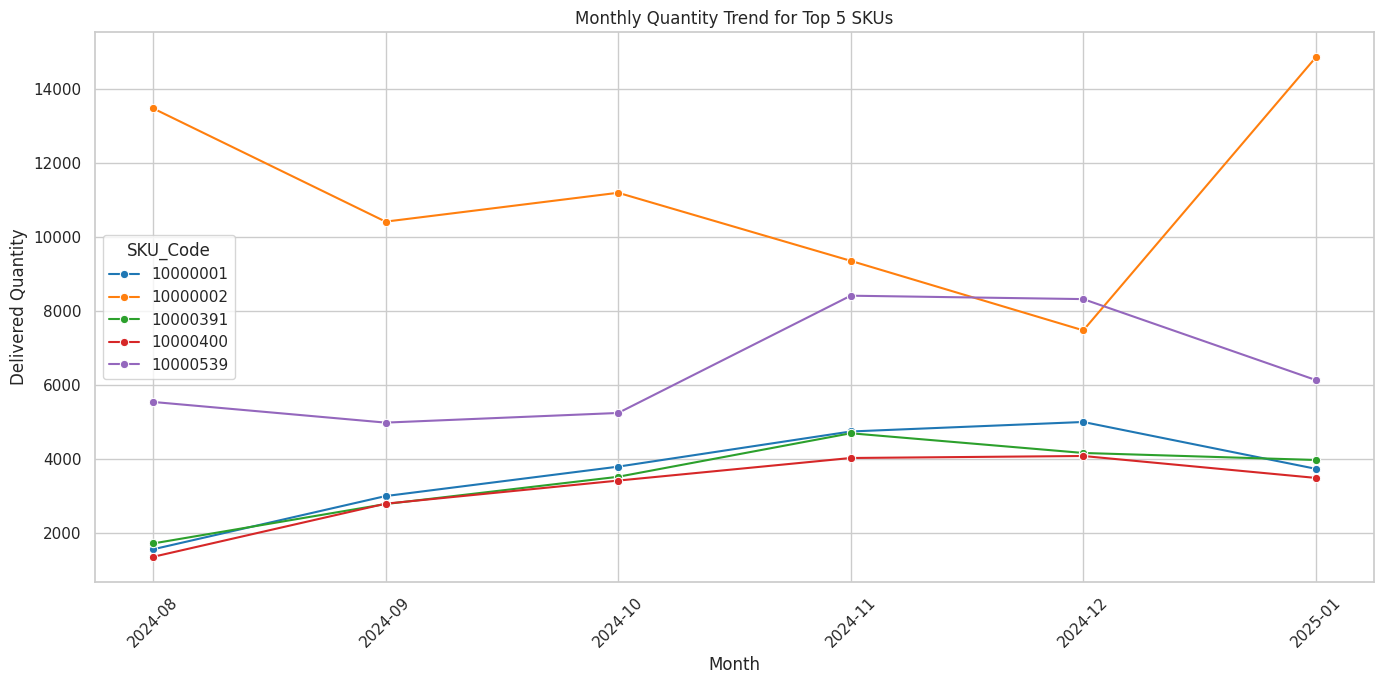

In [43]:
# Add 'Month' column
df['Month'] = df['Delivered_date'].dt.to_period('M').astype(str)

# Get top 5 SKUs by total quantity
top5_skus = df.groupby("SKU_Code")["Delivered Qty"].sum().sort_values(ascending=False).head(5).index

# Filter dataset
df_top_skus = df[df['SKU_Code'].isin(top5_skus)]

# Group by SKU and Month
sku_monthly = df_top_skus.groupby(['Month', 'SKU_Code'])['Delivered Qty'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=sku_monthly, x="Month", y="Delivered Qty", hue="SKU_Code", marker="o", palette="tab10")
plt.title("Monthly Quantity Trend for Top 5 SKUs")
plt.xlabel("Month")
plt.ylabel("Delivered Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

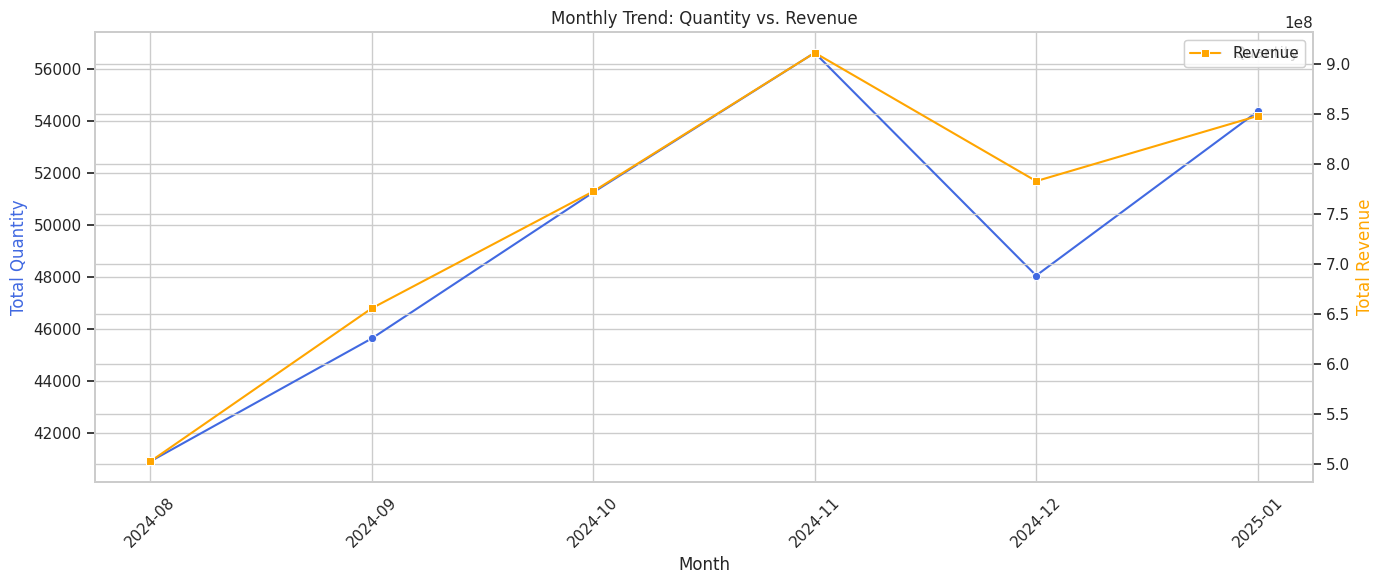

In [13]:
monthly_summary = df.groupby("Month")[["Delivered Qty", "Redistribution Value"]].sum().reset_index()

# Plot both trends
fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=monthly_summary, x="Month", y="Delivered Qty", marker="o", label="Quantity", ax=ax1, color="royalblue")
ax2 = ax1.twinx()
sns.lineplot(data=monthly_summary, x="Month", y="Redistribution Value", marker="s", label="Revenue", ax=ax2, color="orange")

ax1.set_title("Monthly Trend: Quantity vs. Revenue")
ax1.set_xlabel("Month")
ax1.set_ylabel("Total Quantity", color="royalblue")
ax2.set_ylabel("Total Revenue", color="orange")
ax1.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


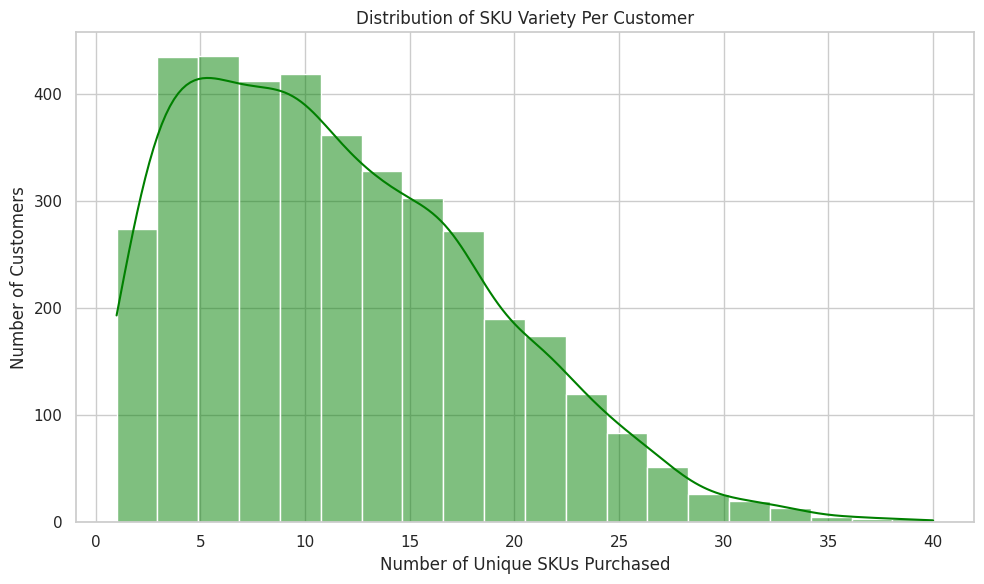

In [14]:
sku_per_customer = df.groupby("Customer_Phone")["SKU_Code"].nunique()

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(sku_per_customer, bins=20, kde=True, color="green")
plt.title("Distribution of SKU Variety Per Customer")
plt.xlabel("Number of Unique SKUs Purchased")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


<ipython-input-16-2ce19982bf8f>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
<ipython-input-16-2ce19982bf8f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


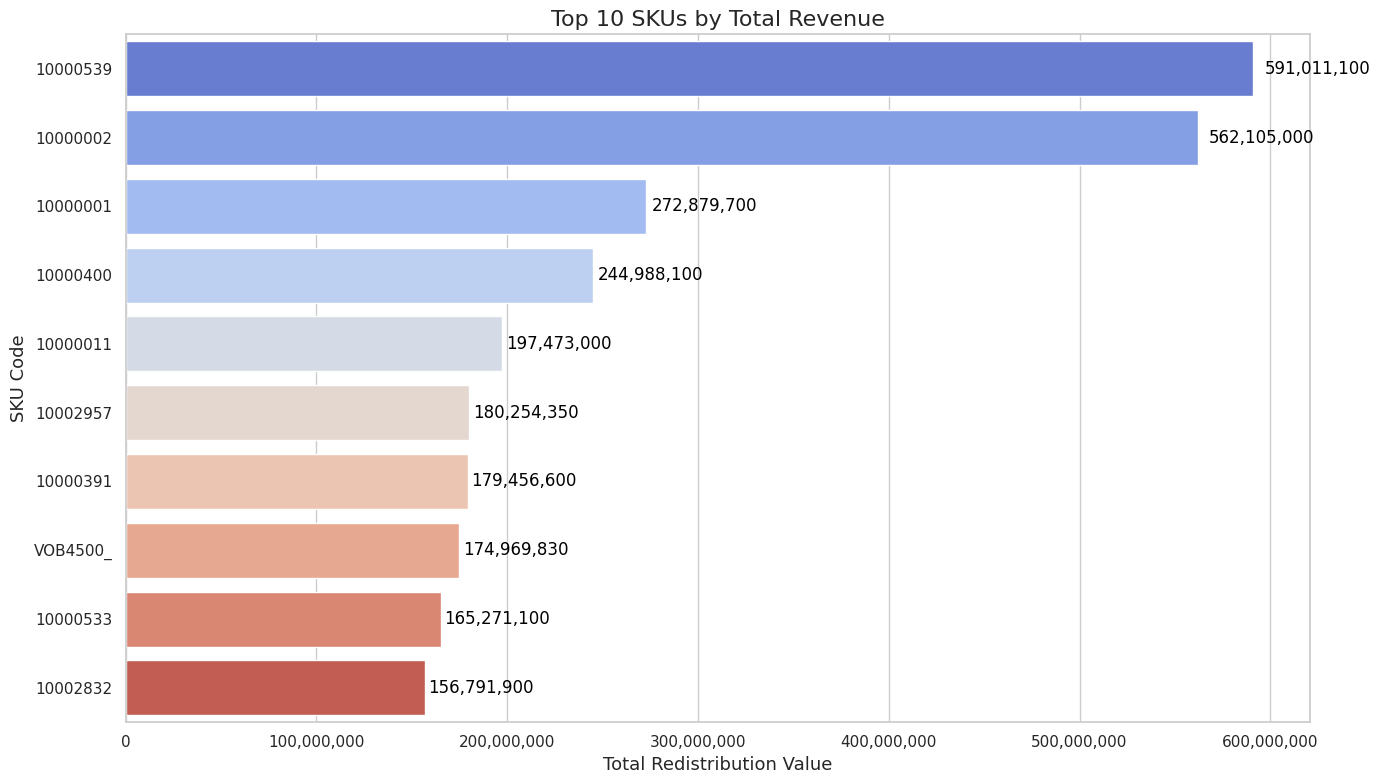

In [16]:
import matplotlib.ticker as ticker

top_skus_value = (
    df.groupby("SKU_Code")["Redistribution Value"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(14, 8))  # Increased size for better readability
ax = sns.barplot(
    x=top_skus_value.values,
    y=top_skus_value.index,
    palette="coolwarm",
    ci=None
)

plt.title("Top 10 SKUs by Total Revenue", fontsize=16)
plt.xlabel("Total Redistribution Value", fontsize=13)
plt.ylabel("SKU Code", fontsize=13)

# Format x-axis to show full numbers
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Optional: Add value labels on each bar
for i, v in enumerate(top_skus_value.values):
    ax.text(v + (v * 0.01), i, f'{int(v):,}', color='black', va='center', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-28-021cc9058474>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(x=avg_order_value.values, y=avg_order_value.index.astype(str), palette="cubehelix", ci=None)
<ipython-input-28-021cc9058474>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=avg_order_value.values, y=avg_order_value.index.astype(str), palette="cubehelix", ci=None)


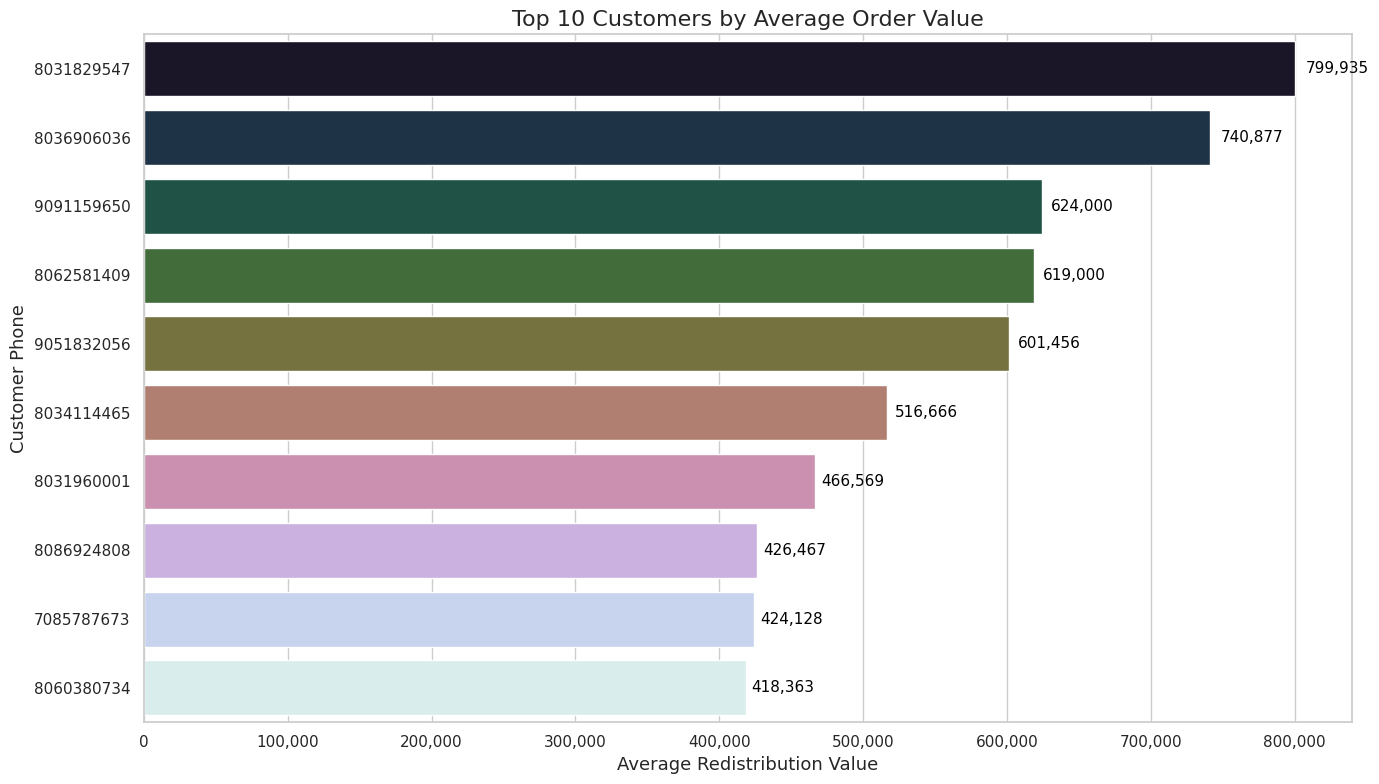

In [28]:
# --- 1. Average Order Value ---
avg_order_value = df.groupby("Customer_Phone")["Redistribution Value"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
ax1 = sns.barplot(x=avg_order_value.values, y=avg_order_value.index.astype(str), palette="cubehelix", ci=None)
plt.title("Top 10 Customers by Average Order Value", fontsize=16)
plt.xlabel("Average Redistribution Value", fontsize=13)
plt.ylabel("Customer Phone", fontsize=13)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
for i, v in enumerate(avg_order_value.values):
    ax1.text(v + (v * 0.01), i, f'{int(v):,}', color='black', va='center', fontsize=11)
plt.tight_layout()
plt.show()



<ipython-input-18-7253dcc2dade>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(x=customer_ltv.values, y=customer_ltv.index.astype(str), palette="Blues_r", ci=None)
<ipython-input-18-7253dcc2dade>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=customer_ltv.values, y=customer_ltv.index.astype(str), palette="Blues_r", ci=None)


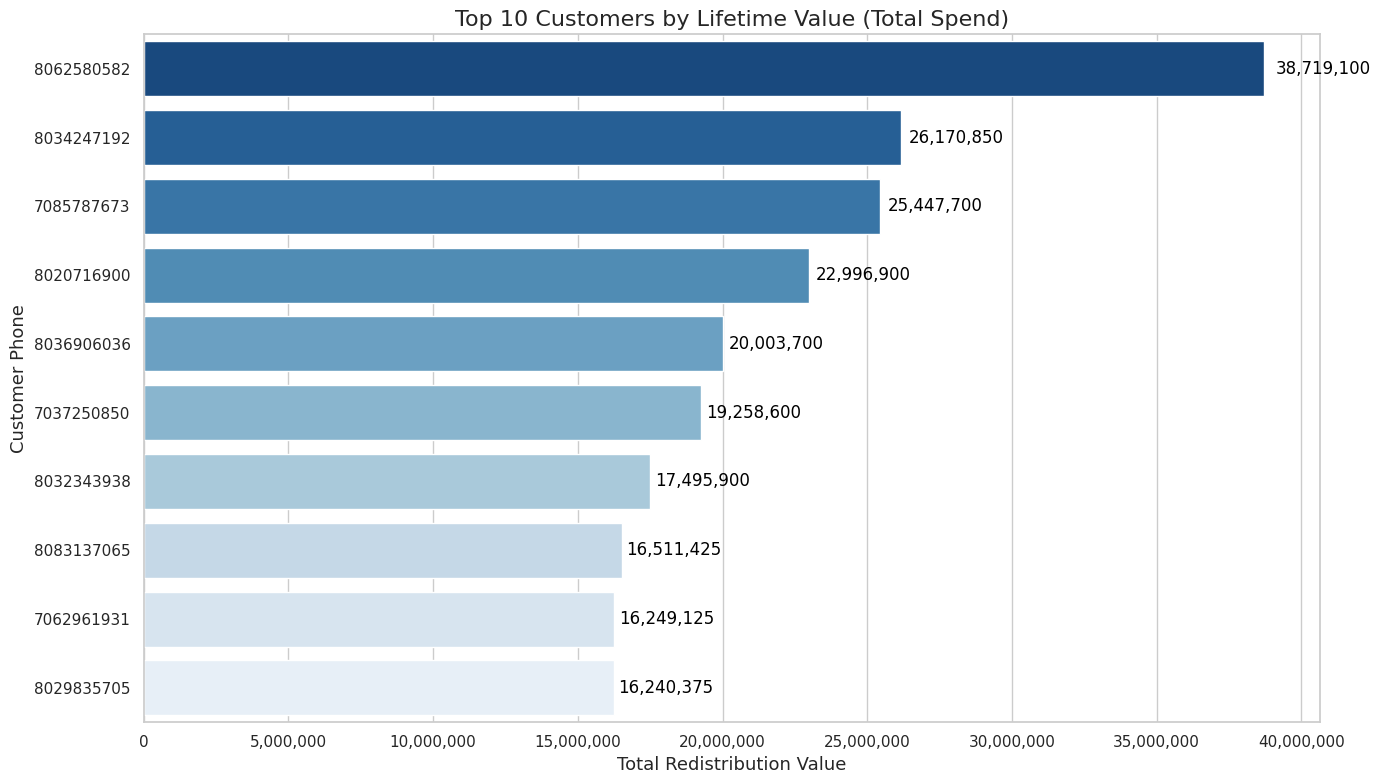

In [18]:
# --- 2. Customer Lifetime Value ---
customer_ltv = df.groupby("Customer_Phone")["Redistribution Value"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
ax2 = sns.barplot(x=customer_ltv.values, y=customer_ltv.index.astype(str), palette="Blues_r", ci=None)
plt.title("Top 10 Customers by Lifetime Value (Total Spend)", fontsize=16)
plt.xlabel("Total Redistribution Value", fontsize=13)
plt.ylabel("Customer Phone", fontsize=13)
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
for i, v in enumerate(customer_ltv.values):
    ax2.text(v + (v * 0.01), i, f'{int(v):,}', color='black', va='center', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-19-8bde4064896b>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax3 = sns.barplot(x=sku_concentration_pct.values, y=sku_concentration_pct.index, palette="Set3", ci=None)
<ipython-input-19-8bde4064896b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x=sku_concentration_pct.values, y=sku_concentration_pct.index, palette="Set3", ci=None)


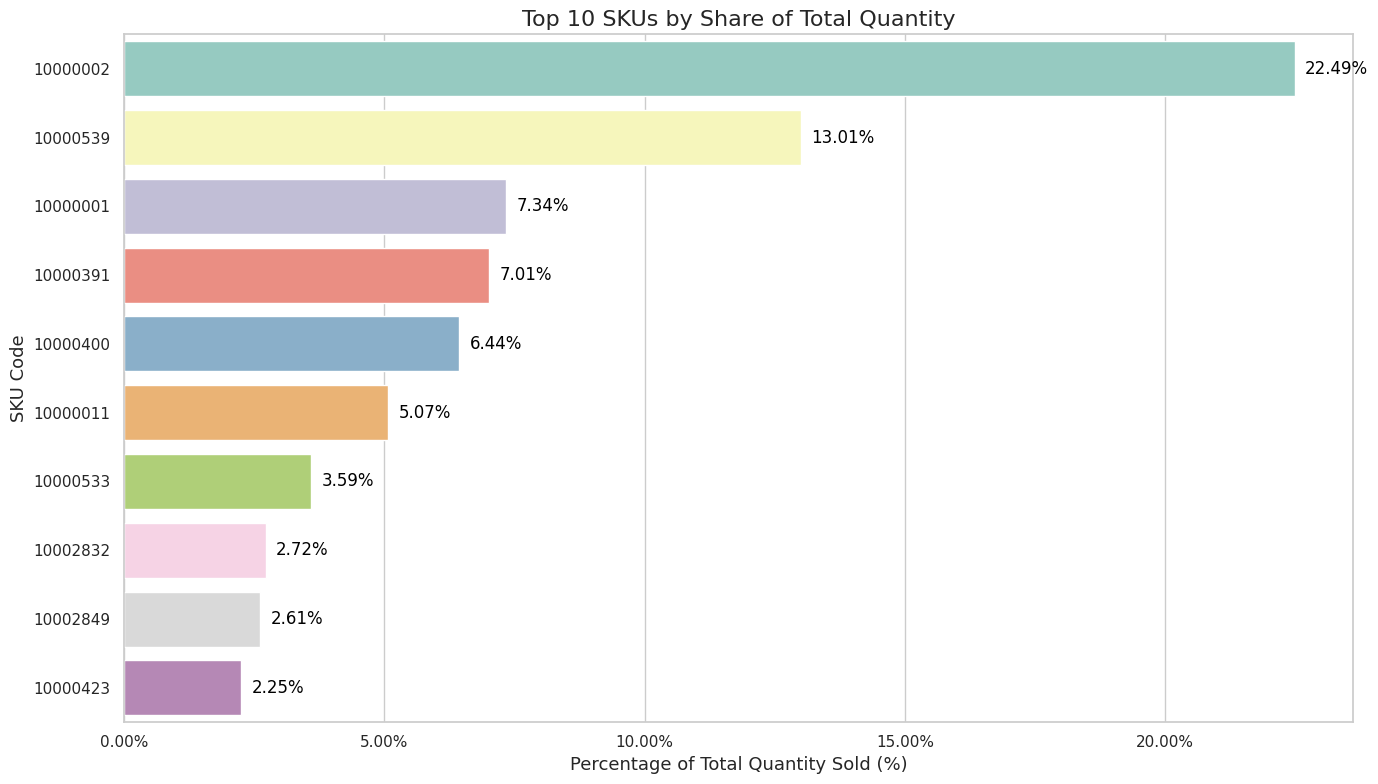

In [19]:
# --- 3. SKU Concentration by Quantity Percentage ---
sku_concentration = df.groupby("SKU_Code")["Delivered Qty"].sum().sort_values(ascending=False)
sku_concentration_pct = (sku_concentration / sku_concentration.sum() * 100).head(10)

plt.figure(figsize=(14, 8))
ax3 = sns.barplot(x=sku_concentration_pct.values, y=sku_concentration_pct.index, palette="Set3", ci=None)
plt.title("Top 10 SKUs by Share of Total Quantity", fontsize=16)
plt.xlabel("Percentage of Total Quantity Sold (%)", fontsize=13)
plt.ylabel("SKU Code", fontsize=13)
ax3.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}%'))
for i, v in enumerate(sku_concentration_pct.values):
    ax3.text(v + 0.2, i, f'{v:.2f}%', color='black', va='center', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-33-307a03825f17>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax5 = sns.barplot(data=pair_df, x="Count", y=pair_df["SKU_Pair"].astype(str), palette="autumn", ci=None)
<ipython-input-33-307a03825f17>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax5 = sns.barplot(data=pair_df, x="Count", y=pair_df["SKU_Pair"].astype(str), palette="autumn", ci=None)


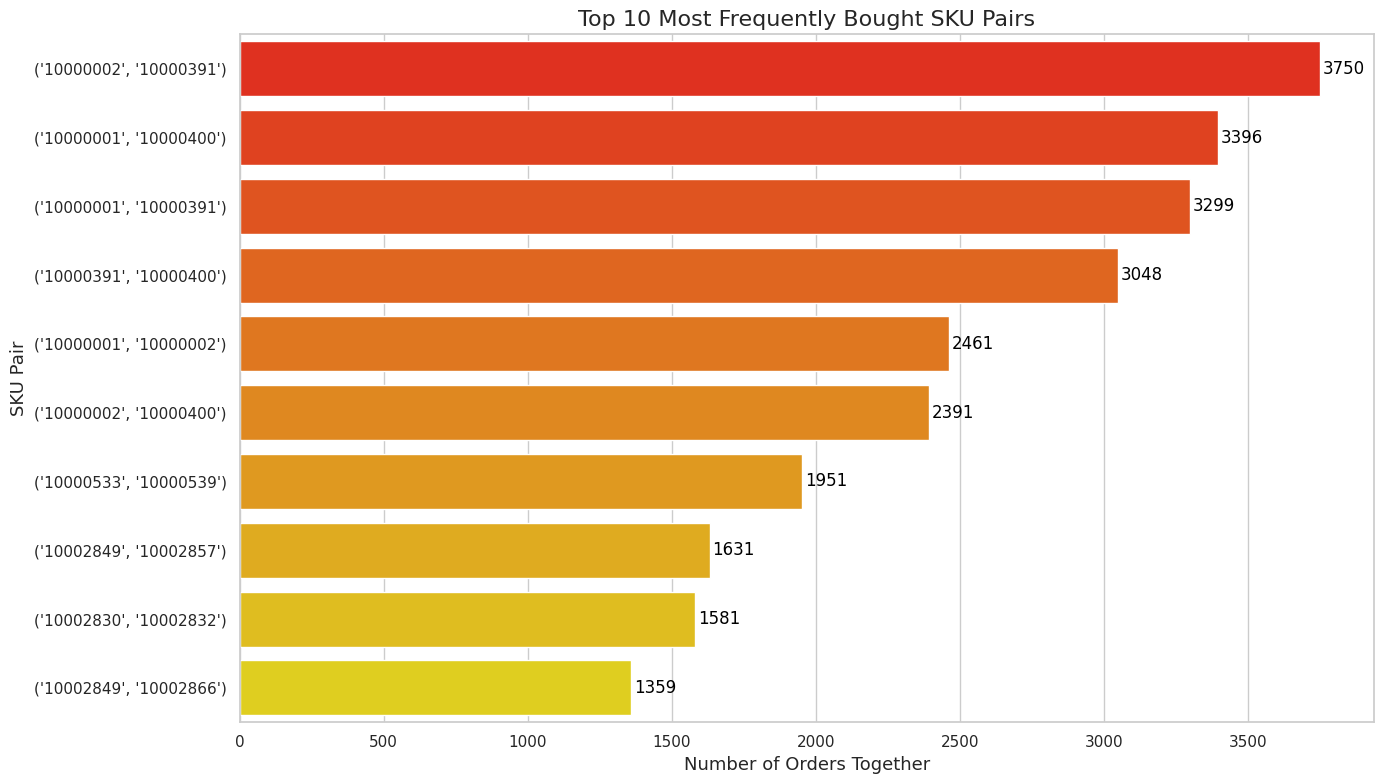

In [33]:
from itertools import combinations
from collections import Counter

# --- 5. Most Frequently Bought SKU Pairs ---
df['Order_ID'] = df['Customer_Phone'].astype(str) + "_" + df['Delivered_date'].astype(str)
order_skus = df.groupby("Order_ID")["SKU_Code"].apply(set)
pair_counts = Counter()
for items in order_skus:
    if len(items) > 1:
        for pair in combinations(items, 2):
            pair_counts[tuple(sorted(pair))] += 1

pair_df = pd.DataFrame(pair_counts.items(), columns=["SKU_Pair", "Count"]).sort_values(by="Count", ascending=False).head(10)

plt.figure(figsize=(14, 8))
ax5 = sns.barplot(data=pair_df, x="Count", y=pair_df["SKU_Pair"].astype(str), palette="autumn", ci=None)
plt.title("Top 10 Most Frequently Bought SKU Pairs", fontsize=16)
plt.xlabel("Number of Orders Together", fontsize=13)
plt.ylabel("SKU Pair", fontsize=13)
for i, v in enumerate(pair_df["Count"].values):
    ax5.text(v + 10, i, f'{v}', color='black', va='center', fontsize=12)
plt.tight_layout()
plt.show()